<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sampling-random-variables" data-toc-modified-id="Sampling-random-variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sampling random variables</a></span></li><li><span><a href="#Coin-toss" data-toc-modified-id="Coin-toss-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Coin toss</a></span></li><li><span><a href="#Monty-Hall-problem" data-toc-modified-id="Monty-Hall-problem-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Monty Hall problem</a></span></li><li><span><a href="#Compute-$\pi$" data-toc-modified-id="Compute-$\pi$-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compute $\pi$</a></span></li></ul></div>

In [1]:
:ext QuasiQuotes

In [2]:
import qualified H.Prelude as H
import Control.Monad
H.initialize H.defaultConfig

# Sampling random variables

In [3]:
import Data.Random

Let us remind types:

```haskell
sample     :: MonadRandom  m   => RVar a -> m a
sampleFrom :: RandomSource m s => s -> RVar a -> m a
```

for sampling and
```haskell
instance Distribution StdUniform Double
instance Distribution Normal Double

stdUniform :: Distribution StdUniform a => RVar a
normal     :: Distribution Normal a     => a -> a -> RVar a
```

we can now try to sample few values:

In [4]:
sample stdUniform :: IO Double

0.42304001577302586

In [5]:
sample stdUniform :: IO Bool

True

In [6]:
sample stdNormal :: IO Double

0.37326061729166193

Since `RVar` is a monad, we can use the whole variety of functions that manimulate monadic values, e.g.:

```haskell
replicateM :: Monad m => Int -> m a -> m [a]

-- specialized for us
replicateM :: Int -> RVar a -> RVar [a]
```

to construct a random variable of list type.

In [7]:
sample $ replicateM 10 stdUniform :: IO [Double]

[0.23719548452538786,0.5091137976624798,0.13350017911474676,0.953018271534197,0.35653812563053466,0.931166566436596,0.9567278223629407,0.723100179433863,0.32866296273209117,0.4760190211565487]

In [8]:
sample $ replicateM 10 stdNormal :: IO [Double]

[0.29494211378473056,-0.7362768352245276,-0.872392349275858,-0.3898349376720261,0.7112175245389564,0.3595292975152045,0.17288159317741217,-2.755271462247697e-2,0.7507449586757787,-0.388028664011613]

This tells us nothing. But let's do some simple plots (we are in the [HaskellR](https://github.com/tweag/HaskellR) notebook).

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC61BMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU2NjY3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhJSUlKSkpLS0tMTExNTU1OTk5PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlaWlpbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx9fX1+fn5/f3+AgICCgoKDg4OFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKTk5OUlJSVlZWWlpaXl5eYmJiZmZmampqbm5udnZ2enp6fn5+goKChoaGioqKjo6OlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW2tra3t7e5ubm7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/w8PDx8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7///8owKoPAAATUklEQVR4nO3dfXwU1b3H8RPQC+QZY6EhBSoYQqESgXIBhQA2VlvwARW8FXsrba21qFAV+mCjaFWwWLG0pmifpVAEq942ilDReAttRXtdCsaIIBSSkPJMIMn5887uSXb2nLOT3T07Seb88v28XkJev5k5GfYtm50kZBhHpGPdfQKocwMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDwAEw/AxAMw8QBMPAATD8DEAzDxAEw8ABMPwMQDMPEATDyrgc8yttv5bSZ7mDN21q9V/1rc6wnvradYb7/eUZdEEXg8q05n1S+xKVu8twK4C4sBPnasNTpOE3gmW9/BVgB3YS5w5GHfOjX7/FnvOL6MPcuP3nVhZulqR73hxv5jf8/G8wOs4I3x63jVpOz8y7bz3WzYikFDflQ9NmtajVis/YDw4d8LD9oOaFu1Pec9/WlMzvWNXN0Q0GwHHllaWpojgOtyM64pY4NOvPRJdn9t63Q2eGY/9hhvvYSNnd0nApw1mK37sF/v6RPY4NbdjP1HifPf8Cw2O7JW9ICXStldfw9PxAHtq7a/z1OM9R3Vi93L1Q0BzXZgUQT4FVb8L77w+t2Rp+hX2eCjfAvLa9nMRjbxByLA7OH605uvWMqb+rJDDnCIl7Evtm5iwyNrRQ9wnhA2RCbigOiqbTnA6/kKNpWrGwKa7cAxT9H157GMiQ8cEB+DV7JvOluK2J4n2ELO/y8C3LfFGf3zoWuHMHZgNyvifB5b7TxXD42sFT0gBjh8QHTVtk6xjGb+urOeuiGgEQLmjUsvZix3VwzwEFbzKLuL83+Ij8HO5I1zM+c9lR0GHhoG/rkC7BwQAxw+ILpqW5H3VO2sp24IaISA13/5V/yDS9gTDvBWvokNOcpfY7ktG9nw4/zeKPA9bDH/K4sDHD1AAY6u2lYUWN0Q0AgBv8L6zr4hk212PrRe94/WMjZkVib7IW8axgY7L4zbgZezvKsGZLB9GnD0AAU4umpbUWB1Q0AjBMzXTMjNHPNzzp8b6FwmHblzWGbp085lUs3lOaN+FgU+fl3mp347nVVqwO4BylN0+6ptuU/RyoaAZjVwMtVX7wiDXNHd59FdkQfedU5GxYpi9nR3n0d3RR6YV5XlZV28ujXxjh22of2Se50vJ9V10Qfu4QGYeAAmHoCJB2DiAZh4ACYegIkHYOIBmHgAJh6AiQdg4gGYeAAmHoCJB2DiAZh4ACYegIkHYOIBmHgAJh6AiQdg4gGYeAAmHoCJB2DiAZh4ACYegIkHYOJ1LfD/PKK27HiXnkDPq2uBr91QpTRzZ5eeQM+ri4Eb1cltAO7cAEw8G4APqc/rVVWHOuPsSGYD8Kp56kuzeT/ujLMjmQ3AP16rTtY96c/59IAATDwA+9KxGrUP0v3Zej4FYF/62hfmKI38S3efkwjAvjT/fXXy7bRu7eNfAPYlAIsA3OUB2KDta9VmaHfXsQq45UiLP++NCPDMlZVKA7RbN9gDfKqi+BzW+8L7T/vw3qgAa1/jLLYY+EuXb64/0/D67K/48N4ALHVQe6pfW+PPGbolBs7bH/ntxPk+vDcdeH6V9imCZnUfssC/uVl9ql+4SHs4jqR3romBS5+J/Pbc2PTeUSQdeNTnv6407jV1ny4FXrFE7SFtH9+AK9XJ8iL14bjhrqRPPW6JgbcVjpr71bkXDdqW8tpbtSeg/2xQ9xn1R3VSod2duUuBJ29Xm6Dt03nAyz6rTt6+M/E6HZXEq+izVZWPVFYZ3EF9qvoEVJlXq+4TOODpSUyIARtfJumPTGGtOgGwVHcAm18mAThBwQDWL5MaxMem6roERwI4QcEA1i+TqsTru/LvJTgyaMBnFqgvUb9erk2GaYdRB/a8TPrdqgRHBg248XLtIjNXm+Rph+WXq/XVLgZsBva8TLIP+FptlG80GXBQndgM7HmZBGA3q4HDHdI+BQXg2GwGnvUh3zup17kzPlI3ANjNZuA+IT73lhNnFs9WNwDYzXLgYTudRydX3dBJwJeVqC9aBy5R90kG+OTP1E+UPj5F2wnADvCms1e9xPmfB6kbOgm4bKU6mbtInSQDvLNc/VLHqkJtp84DvnKc+v/pyLHaRMPrDuDLh/TJH8lfzV+hbgg68G3q5IOuBJ60Wp1c8x11suBmddI9r6LPvLeVv/mqNgawm93AHnUj8K/v0P5BqfaYAziSncB3j1S/7eKmCnUfAEeyE/hbc9TJFgDHD8AGEwCLACxlBry5WP13i3N+qp1QB/kH/EvtZ2AVa4cU1qoTAEvpwOtHH1baNVc7oQ7yD3iS9sI2WzuksFad+AVcdbP63p+5Sd3HTuBSdXKwm4D1J2T9kSmsVSd+AT95gfr8MX+Uug+AUytQwCvL1MkfARwOwAYTAIsALAVgEYClACwCsEcANpgAWARgKQCLACwFYBGAPQKwwQTAIgBLAVgEYCkAiwDsEYANJgAWAVgKwCIASwFYBGCPAGwwAbAIwFIAFgFYCsAiAHsEYIMJgEUAlgKwCMBSABYB2CMAG0wALAKwFIBFAJYCsAjAHgHYYEIOOP49GwDsZjOw5z0bAOxmM7Dnre0A7GYzsOet7QDsZjNwsvdsALCUPcDJ3rMBwFL2ACd7zwYAS1kEjMskNVrAuEzSJrSAcZmkTWgB65dJb4qfNHbT96X9ACxlD7B+mbRX/KzA+x6V9gOwlD3AuEzSJrSAcZmkTYgBR6rW7w8NYDf7gQv2aiMAu9kMnNU7HOvVW90AYDebgd+dPKemrq7/Du2G7gB2sxmYNz9e8iKeomMjBsz5ezPm5QDYjRwwb6m8sV4bAtjNduC4AdgNwKLCWnUCYCkAiwCcdAA2mABYBGApAIsALAVgEYA9ArDBBMAiAEsBWARgKQCLAOwRgA0mABYBWArAIgBL
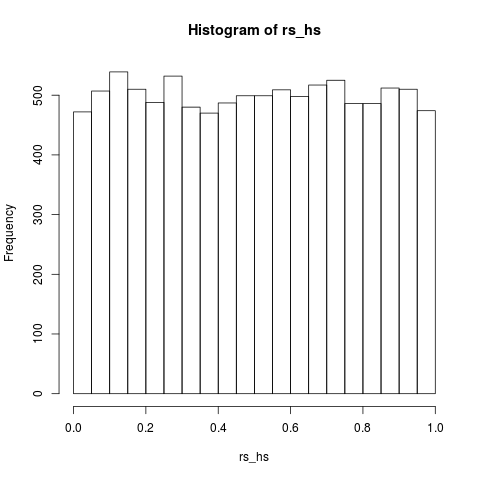

In [9]:
rs <- sample $ replicateM 10000 stdUniform :: IO [Double]  -- get bigger sample
[rgraph|hist(rs_hs)|]  -- plot histogram with R

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAeAAAAHgCAMAAABKCk6nAAAC1lBMVEUAAAABAQECAgIDAwMEBAQFBQUGBgYHBwcICAgJCQkKCgoLCwsMDAwNDQ0ODg4PDw8QEBARERESEhITExMUFBQVFRUWFhYXFxcYGBgZGRkaGhobGxscHBwdHR0eHh4fHx8gICAhISEiIiIjIyMkJCQlJSUmJiYnJycoKCgpKSkqKiorKyssLCwtLS0uLi4vLy8wMDAxMTEyMjIzMzM0NDQ1NTU3Nzc4ODg5OTk6Ojo7Ozs8PDw9PT0+Pj4/Pz9AQEBBQUFCQkJDQ0NERERFRUVGRkZHR0dISEhLS0tMTExNTU1PT09QUFBRUVFSUlJTU1NUVFRVVVVWVlZXV1dYWFhZWVlbW1tcXFxdXV1eXl5fX19gYGBhYWFiYmJjY2NkZGRlZWVmZmZnZ2doaGhpaWlqampra2tsbGxtbW1vb29wcHBxcXFycnJzc3N0dHR1dXV2dnZ3d3d4eHh5eXl6enp7e3t8fHx+fn5/f3+AgICBgYGCgoKDg4OEhISFhYWGhoaHh4eIiIiJiYmKioqLi4uMjIyNjY2Ojo6Pj4+QkJCRkZGSkpKUlJSVlZWXl5eYmJiZmZmampqbm5udnZ2enp6fn5+goKChoaGioqKkpKSlpaWmpqanp6eoqKipqamqqqqrq6usrKytra2urq6vr6+wsLCxsbGysrKzs7O0tLS1tbW3t7e4uLi5ubm7u7u8vLy9vb2+vr6/v7/AwMDBwcHCwsLDw8PExMTFxcXGxsbHx8fIyMjJycnKysrLy8vMzMzNzc3Ozs7Pz8/Q0NDR0dHS0tLT09PU1NTV1dXW1tbX19fY2NjZ2dna2trb29vc3Nzd3d3e3t7f39/g4ODh4eHi4uLj4+Pk5OTl5eXm5ubn5+fo6Ojp6enq6urr6+vs7Ozt7e3u7u7v7+/x8fHy8vLz8/P09PT19fX29vb39/f4+Pj5+fn6+vr7+/v8/Pz9/f3+/v7////DWWJ2AAAQz0lEQVR4nO3di3tUxRnH8eFigYSQCCglSKhAAEEIMQVEuWhDrVijEpVSEar1UrVW0arBYq0oSr3VFC+9qAVBbMUaLtGC0UarFDVWjKgoqCQGNIYkJPMf9Oyb3SU5eXc5yzmT7Lz7+z4P5Hlm5kzm2Y9scpJNVBqJTnX3AZDZACw8AAsPwMIDsPAALDwACw/AwgOw8AAsPAALD8DCA7DwACw8AAsPwMIDsPAALDwACw/AwgOw8AAsPAALz2rgZqV2Om/OVndppZqD2vWN3J4PxJ5tUL2CekddkkTgAlXhZ9cF6vSXYs8CuAtrB/z1163RYZ/AZ6u1cWYB3IUdBqaHfeuM/oPn7nB8lXpKH7h2dFreKke99sJj859RBXqvGvRKwRpdNq1/1pmv651q5MrsnPsr8tNnVbdtFrkgdPmtoYHwBeFdIznv6cVJGefXafdEkmY78Li8vLyMNuB9A3r8eKbKrt/wPbV0V+tsNfzsfupe3Tpd5Rf1IeD04WrNJ/16zZ6ihrfuVOo7Y50/o9JVEe0VvWBDnrr2zdBI2wWRXSPvs0GpvuN7qhu1eyJJsx24LQLepHI/19edv5Oeoreo4Qf0SyqzpVyNa9S3E7C6q+Zg+VnLdGNf9aUDXKVnqotbN6tRtFf0AucJ4Vkaabsgums4B3itXqlmaPdEkmY7cLun6JqBqsfU2/e2fQx+UF3lzAxTHz+grtP6HQLu2+IM/e/Oc3OU2rtTDdN6vlrlPFePoL2iF7QDDl0Q3TVcg+pxSG9z9nNPJGmCgHXdsslKDXi/HXCOqr5bXav1220fg52RV45Jm/9I/xDwiBDw4y5g54J2wKELoruGo/dU4eznnkjSBAGvveTP+qPp6gEHeKverHIO6H+pAS3r1ahv9I1R4BvUEv2GYoCjF7iAo7uGiwK7J5I0QcCbVN+iC9JUufOh9by3W2eqnLlp6j7dOFINdz4xjgCvUJnnHN9DfdoJOHqBCzi6a7gosHsiSRMErJ+eMiBt0uNarxvi3Cbtv2ZkWt6jzm1S9ZyM8X+MAn9zXtpJT85WpZ2AD1/geoqO7Bru8FO0ayJJsxrYSzUV20MgZ3X3Obor8cDv9+5RsjJXPdrd5+iuxAPrspmZ6ZNXtR55YdyejdxyrwnkUF2XfOAUD8DCA7DwACw8AAsPwMIDsPAALDwACw/AwgOw8AAsPAALD8DCA7DwACw8AAsPwMIDsPAALDwACw/AwgOw8AAsPAALD8DCA7DwACw8AAsPwMIDsPAALDwACy/FgR9azpbsv/wqgVIceHIZ1xJBv9EjVYDXXc6Wyy7+E4Ct66oXq7my2MUAtq+r3mGHASwlAAsPwMIDsPAALDwACw/AwgOw8AAsPAALD8DCA7DwACw8AAsPwMIDsPAALDwACw/AwgOw8AAsPAALD8DCA7DwACw8AAsPwMIDsPAALDwACw/AwgOw8AAsPAALD8DCA7DwACw8AAsPwMIDsPAALDwACw/AwgOw8AAsPAALD8DCA7DwACw8AAsPwPFq2d9i+hymA3DMGkpye6teo5ce7ILTmAvAMVswp7ymqXZb0aIuOI25AByzzD30pn6w6aMYDcAxy3uM3qzLN3wSswE4ZpVDxxcvLp6YXdkFpzEXgGPXXFa6vLSs2fxZTAbgeOE2yd5wm8SUWsC4TbI63CYxpRZwCt4m3Ta+kOt8kwc0FW6TmC5fyA7PDuw0XdjR3CY90/YfdMFvzR0r8AAcvy/rOo/97eFgj2I0AMds7id697Sex5zxmXsCwDZ0ZOA+Vbp4YX3TkiL3RHICf37RPK7cbexqABPwyPe0rhvgnkhO4DcWVXON+Tu7GsAO8ObmczZo/XK2eyJJga9nh08GcKzm5PTJGqe3ZK10TwDYhrx8Ft30wVb96pZOwwC2IR+vqgSwDQGYKbWAqyK5JwBsQ0cGnqrShlHuCQDb0JGBWy+9mp8AsA15+Bi8cQU/DmAbwidZTACmAGxDAGYCMAVgGwIwE4ApANsQgJkATAHYhgDMBGAKwDYEYCYAUwC2IQAzAZgCsA0BmAnAFIBtCMBMAKYAbEMAZgIwBWAbAjATgCkA2xCAmQBMAdiGAMwEYArANgRgJgBTALYhADMBmAKwDQGYCcAUgG0IwEwApgBsQwBmAjAFYBsCMBOAKQDbEICZAEwB2IYAzARgCsA2BGAmAFMAtiEAMwGYArANAZgJwBSAbQjATACmAGxDAGYSCHzNS4cSvhTANhQGLpk05MpNzfGXugOwDUWfoqvvmzHkshebErgUwDYUBa5bs/DYCadmr/N+KYBtKAx8z+z0Hz74odZbvuv9UgDbUBj40rUH6O03+BesRQI3Plymn11xMMailv0tzCiAbSgM/NNTKvVbp13KrWgoye2teo1e2kkfwDYUBu5f7fz1cSa3YsGc8pqm2m1Fi9wTALahMPCoV52/KkZyKzL30Jv6we4JANtQGPipQdfce93gJ7gVeY/Rm3X57gkA21DkPvi9ZT8veYtdUTl0fPHi4onZle4JANuQh282NJeVLi8t6/x1TADbUBh446ljQ8VYhNskymbgnJt2VDlxK3CbFMlm4KHfxlyB26RINgOvuCvm9wpxmxTJZuDT0jPGxPgYjNukSDYDV7XFrcBtUiSbgbU+tKc1xpJOt0lfV1MP3m/4bEcVgDsWBt5T2K//rqnVMRa5bpNeuJwqXGL4bEcVgDsWBr74ivohLSVncitwmxTJZuCBdXqI/iqNW4HbpEg2A0/6hwO8eQK3ArdJkWwGLh90Qb+Fx73ArcBtUiSbgXXNE3es2sOuwG1SJKuB44TvJoWzGXhqWwldCmAbCgNXVFS8snrW6oQu7W7grau57mZfOZjywFRtHreiqirG1zG7G3h6KdfiAnYxgJ3eyuBWTFVpwyj3RHcD84/3X8wBTylji/X1v+So3cfggt7X
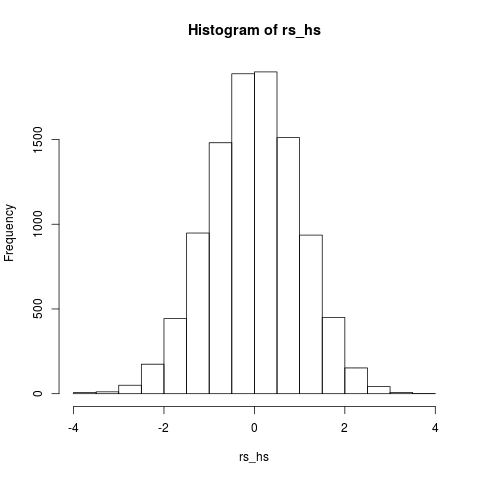

In [10]:
rs <- sample $ replicateM 10000 stdNormal :: IO [Double]
[rgraph|hist(rs_hs)|]

# Coin toss

Construct random variable for our custom type, using other predefined random variables.

In [11]:
import Data.Random.Distribution.Bernoulli (bernoulli)

We will use:

```haskell
bernoulli :: Distribution (Bernoulli b) a => b -> RVar a
```

which constructs random variable with Bernoulli distribution:

- it returns either of two values; `(True, False)` for us;
- `True` with probability `p` and `False` with probability `1-p` 

We will draw Boolean values, so for us it will specialize to:

```haskell
bernoulli :: Double -> RVar Bool
```

In [12]:
data Coin = Head | Tail deriving (Bounded, Enum, Show)

In [13]:
toss :: RVar Coin
toss = do
    x <- bernoulli 0.5
    case x of
        True -> return Head
        False -> return Tail

In [14]:
sample toss

Tail

We can make it simpler for those more familiar with monadic and applicative syntax:

In [15]:
bool2Coin :: Bool -> Coin
bool2Coin True = Head
bool2Coin False = Tail

In [16]:
toss = bernoulli 0.5 >>= return . bool2Coin

Line 1: Use <$>
Found:
bernoulli 0.5 >>= return . bool2Coin
Why not:
bool2Coin <$> bernoulli 0.5

In [17]:
toss = bool2Coin <$> bernoulli 0.5

In [18]:
xs <- fmap show <$> sample (replicateM 10000 toss)

In [19]:
[rprint| table(xs_hs) |]

xs_hs
Head Tail 
4990 5010

# Monty Hall problem

From [wiki]():

> Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

![img](Monty_open_door.svg.png)

In [20]:
import Data.Random.List (randomElement)
import Data.List

We start with types and utility functions:

In [21]:
data Result = Win | Loose deriving (Eq, Show)
data Door = First | Second | Third deriving (Bounded, Enum, Eq, Show)

result :: Door -> Door -> Result
result prize choice | prize == choice = Win
                    | otherwise       = Loose
doors = [minBound..maxBound]

Now, we implement two strategies:

In [22]:
mhChange :: RVar Result
mhChange = do
    prize <- randomElement doors
    choice <- randomElement doors
    opens <- randomElement (doors \\ [prize, choice])
    let change = head $ doors \\ [choice, opens]
    return $ result prize change

In [23]:
mhKeep :: RVar Result
mhKeep = do
    prize <- randomElement doors
    choice <- randomElement doors
    return $ result prize choice

In [24]:
mhKeep = result <$> randomElement doors <*> randomElement doors

Now, small utility function that compute frequency on `Win` results in the list:

In [25]:
winFreq :: [Result] -> Double
winFreq rs = let l = fromIntegral . length
                 w = l $ filter (==Win) rs
             in w / l rs

In [26]:
change <- sample $ replicateM 10000 mhChange
winFreq change

0.6678

In [27]:
keep <- sample $ replicateM 10000 mhKeep
winFreq keep

0.3363

# Compute $\pi$

A very basic (and inefficient) way to approximate $\pi$.

In [28]:
inCircle :: Double -> Double -> Bool
inCircle x y = x^2 + y^2 <= 1

In [29]:
point = inCircle <$> stdUniform <*> stdUniform

In [30]:
areaMC :: [Bool] -> Double
areaMC ps = let l = fromIntegral . length 
            in l (filter id ps) / l ps

In [31]:
piMC n = (*4) . areaMC <$> sample (replicateM n point)

In [32]:
piMC 1000000

3.142628

In [33]:
piMC' n = (*4) . areaMC <$> replicateM n point

In [34]:
sample (piMC' 1000000)

3.140376

In [35]:
mcPi :: Int -> IO Double
mcPi n = do
    ps <- sample $ replicateM n point
    let inc = fromIntegral . length $ filter id ps
        area = inc/fromIntegral n
    return $ 4*area        

In [36]:
mcPi 1000000

3.14078